# Automobile Data Set

En el siguiente ejercicio deberá de usar el conjunto de datos de [automóviles](http://archive.ics.uci.edu/dataset/10/automobile) del repositorio UCI que contiene $205$ instancias. El conjunto de datos también puede ser descargado desde [Kaggle](https://www.kaggle.com/datasets/toramky/automobile-dataset). El objetivo de este dataset es predecir el precio de un automóvil dado un conjunto de $26$ características que incluyen: tipo de combustible, largo, ancho, información de las ruedas, motor, etc.

In [ ]:
#from google.colab import drive

# Mount Google Drive
#drive.mount('/content/drive')

## Librerías

Importar las librerías que crea convenientes

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


## Descarga del conjunto de datos

In [ ]:
!wget -q http://archive.ics.uci.edu/static/public/10/automobile.zip
!unzip -q automobile.zip

## Lectura de datos

El primer paso es cargar el conjunto de datos:

In [ ]:
# Nombres de características ya que el dataset original no las incluye
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

#"/content/drive/My Drive/Datasets/Automobile_data.csv"
#data_df = pd.read_csv("Automobile_data.csv", na_values="?")
# Leer archivo CSV y convertir caracter '?' a NaN
#data_df = pd.read_csv("https://www.kaggle.com/datasets/toramky/automobile-dataset?select=Automobile_data.csv")
file_path = "imports-85.data"
data_df = pd.read_csv(file_path, header=None, names=headers, na_values="?" )
data_df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [ ]:
data_df.isna().sum()

,0
symboling,0
normalized_losses,41
make,0
fuel_type,0
aspiration,0
num_doors,2
body_style,0
drive_wheels,0
engine_location,0
wheel_base,0


In [ ]:
data_df.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Análisis Exploratorio de Datos

Realizar el análisis exploratorio de datos usando la data de entrenamiento, puede realizar visualizaciones

In [ ]:
multicol = data_df.select_dtypes(include = ['object'])
multicol


,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


<ipython-input-9-ba29f2d86cfe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_df[column], palette="Set2")


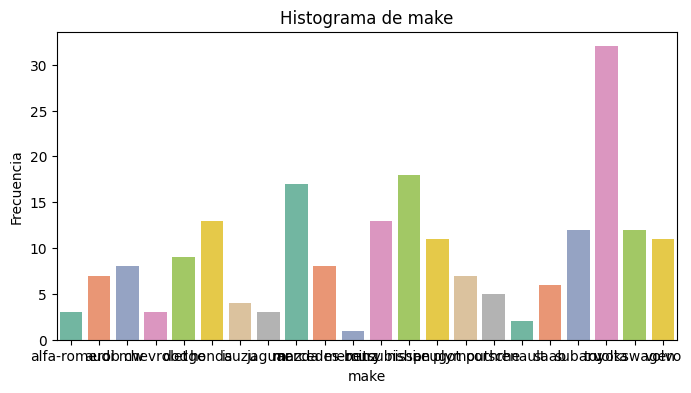

<ipython-input-9-ba29f2d86cfe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_df[column], palette="Set2")


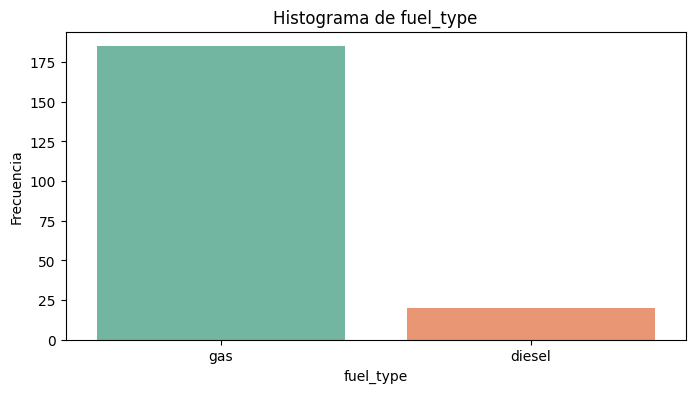

<ipython-input-9-ba29f2d86cfe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_df[column], palette="Set2")


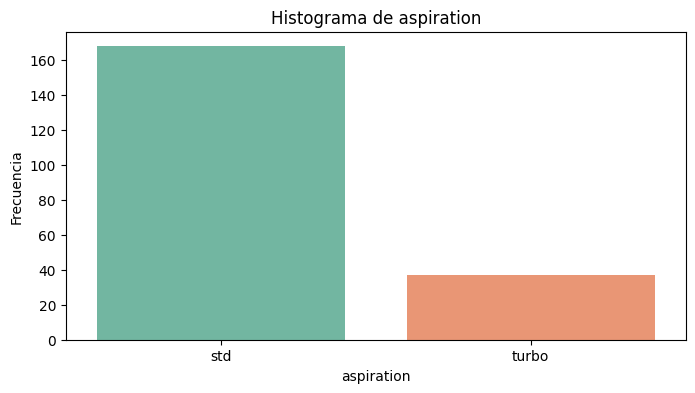

<ipython-input-9-ba29f2d86cfe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_df[column], palette="Set2")


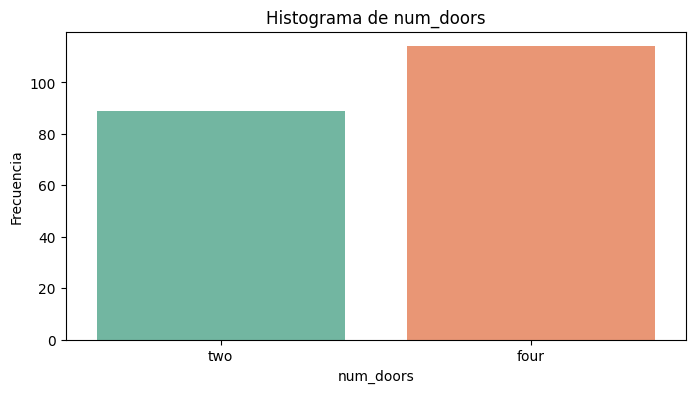

<ipython-input-9-ba29f2d86cfe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_df[column], palette="Set2")


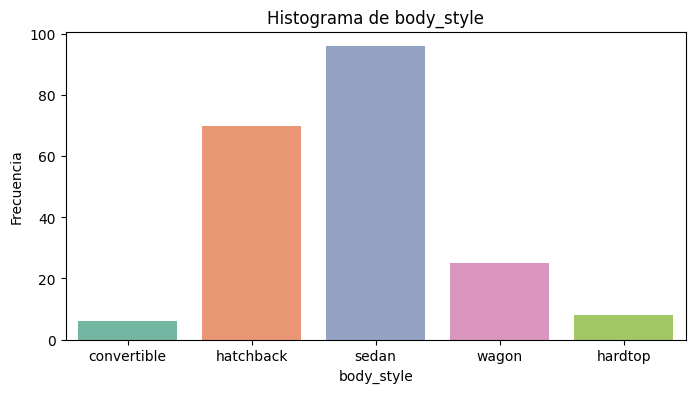

<ipython-input-9-ba29f2d86cfe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_df[column], palette="Set2")


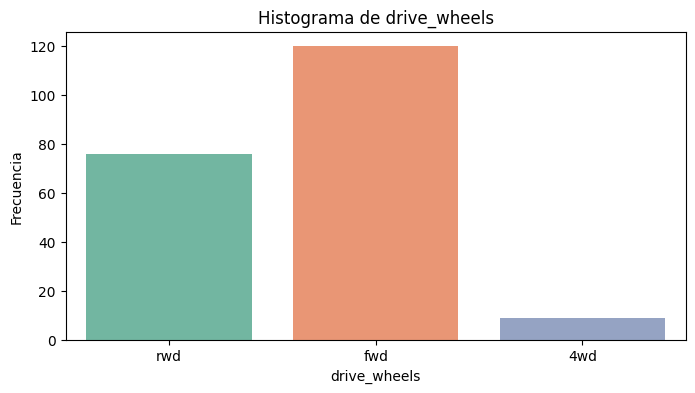

<ipython-input-9-ba29f2d86cfe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_df[column], palette="Set2")


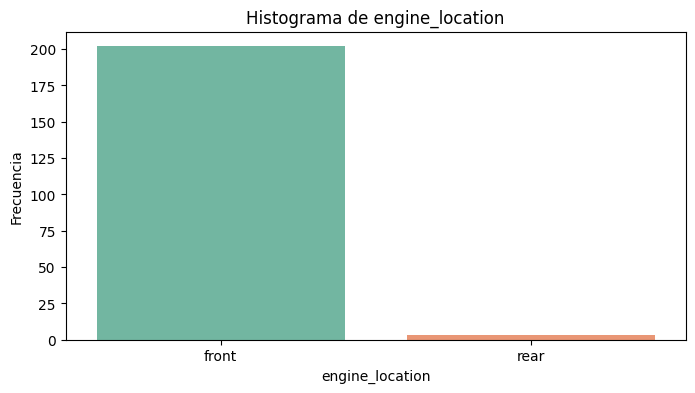

<ipython-input-9-ba29f2d86cfe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_df[column], palette="Set2")


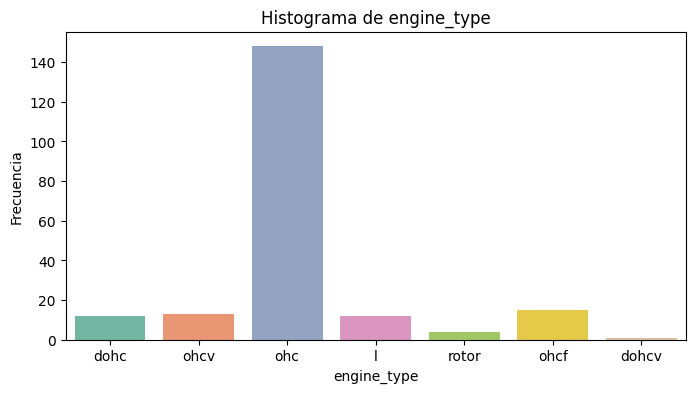

<ipython-input-9-ba29f2d86cfe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_df[column], palette="Set2")


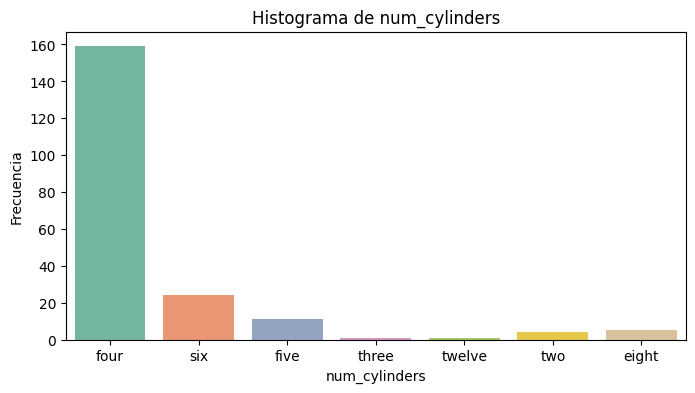

<ipython-input-9-ba29f2d86cfe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_df[column], palette="Set2")


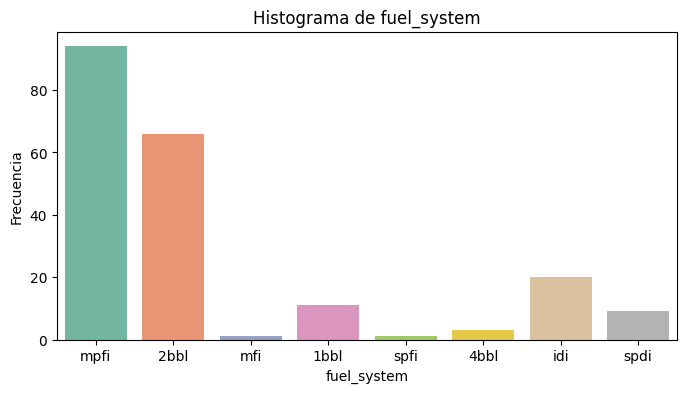

In [ ]:
#Histrograma de variables categoricas
categorical_columns = data_df.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data_df[column], palette="Set2")
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

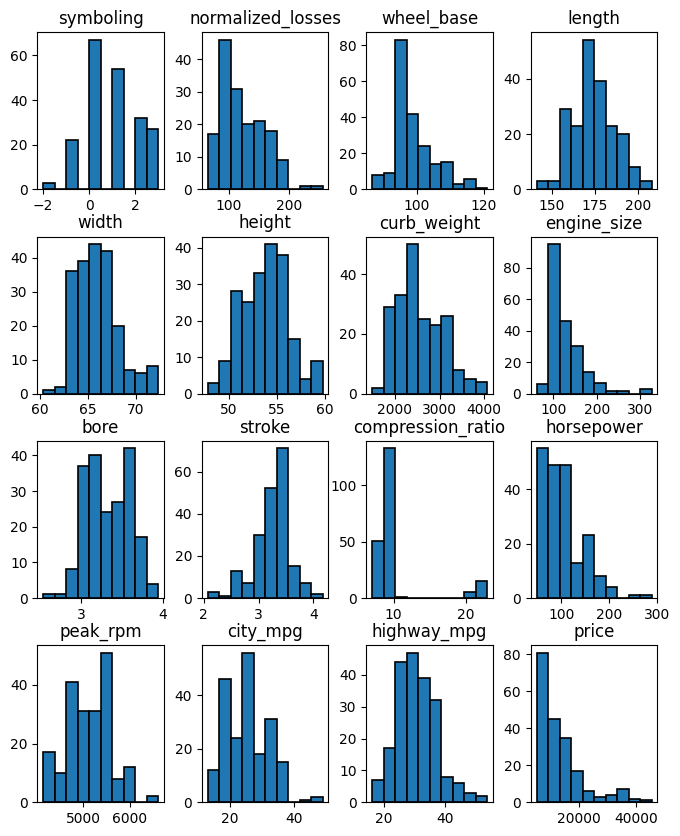

In [ ]:
_ = data_df.hist(edgecolor = 'black', linewidth = 1.2, grid=False, figsize=(8,10))

In [ ]:
"""sns.pairplot(data_df)
plt.show()"""

'sns.pairplot(data_df)\nplt.show()'

## Preprocesamiento de nulos

Preprocesar los datos acorde al tipo de dato (numéricos y categóricos)

In [ ]:
data_df.isnull().sum()

,0
symboling,0
normalized_losses,41
make,0
fuel_type,0
aspiration,0
num_doors,2
body_style,0
drive_wheels,0
engine_location,0
wheel_base,0


In [ ]:
# Elimino la columna con demasiados nulos
data_df = data_df.drop('normalized_losses', axis=1)


In [ ]:
#Eliminar filas con valores nulos. Se eliminan 13 registros en total (de 205 a 193)
df= data_df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel_type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num_doors          193 non-null    object 
 5   body_style         193 non-null    object 
 6   drive_wheels       193 non-null    object 
 7   engine_location    193 non-null    object 
 8   wheel_base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb_weight        193 non-null    int64  
 13  engine_type        193 non-null    object 
 14  num_cylinders      193 non-null    object 
 15  engine_size        193 non-null    int64  
 16  fuel_system        193 non-null

## Evaluación de Multicolinealidad

In [ ]:
def get_correlation_matrix(df, sort_values=False, abs_values = False):
    corr_matrix = df.corr()
    corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    corr_matrix = corr_matrix.stack().reset_index()
    corr_matrix.columns = ['Característica 1', 'Característica 2', 'Correlacion']

    if abs_values:
        corr_matrix['Correlacion'] = corr_matrix['Correlacion'].abs()
    if sort_values:
        corr_matrix = corr_matrix.sort_values(by=['Correlacion'],ascending=False)
    return corr_matrix

numeric_df = df.select_dtypes(include = ['float', 'int'])
corr_df = get_correlation_matrix(numeric_df, sort_values=True, abs_values=True)
corr_df

,Característica 1,Característica 2,Correlacion
102,city_mpg,highway_mpg,0.971975
76,engine_size,price,0.888778
29,length,curb_weight,0.882694
14,wheel_base,length,0.879307
40,width,curb_weight,0.867640
...,...,...,...
71,engine_size,compression_ratio,0.025257
11,symboling,city_mpg,0.017639
7,symboling,stroke,0.010884
100,peak_rpm,highway_mpg,0.008412


In [ ]:
numeric_df.corrwith(numeric_df['price']).abs().sort_values(ascending=False)

,0
price,1.000000
engine_size,0.888778
curb_weight,0.835368
horsepower,0.812453
width,0.754649
highway_mpg,0.719178
city_mpg,0.706618
length,0.695928
wheel_base,0.584951
bore,0.546295


In [ ]:
#corr_df[corr_df['Característica 1'] == 'city_mpg']

In [ ]:
#numerical_columns = _X_train.select_dtypes(include = ['float', 'int'])
#numerical_columns = _X_train.select_dtypes(include = ['float', 'int'])
numerical_columns = df.select_dtypes(include = ['float', 'int'])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Compute VIF
vif_df = calculate_vif(numerical_columns)
print("Variance Inflation Factor (VIF):\n", vif_df)


Variance Inflation Factor (VIF):
               Feature          VIF
0           symboling     2.515966
1          wheel_base  2384.316229
2              length  1987.759032
3               width  2849.302601
4              height   960.879704
5         curb_weight   392.921904
6         engine_size   109.712772
7                bore   290.673056
8              stroke   139.695014
9   compression_ratio    17.569666
10         horsepower    78.732755
11           peak_rpm   221.133027
12           city_mpg   456.400139
13        highway_mpg   518.537396
14              price    23.946892


In [ ]:
# Usando el numero de condicion IC. Si es mayor a 30 indica multicolinealidad
#eigenvalues, _ = np.linalg.eig(matriz_correlacion)
#condition_number = np.sqrt(eigenvalues.max() / eigenvalues.min())

#print("Condition Number:", condition_number)

## Particionar la data de entrenamiento en entrenamiento y validación

La nueva data de entrenamiento será usada para preprocesar y entrenar los modelos. La data de validación será usara para elegir el mejor modelo

In [ ]:
X = df.drop(['price'], axis=1)
y = df['price']

print(X.shape, y.shape)

(193, 24) (193,)


In [ ]:
SEED = 42
np.random.seed(SEED)

# Importamos método de model_selection
from sklearn.model_selection import train_test_split

# Realizamos el particionamiento dado un porcentaje
_X_train, X_test, _y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=SEED)

print('Tamaño original del dataset: ', X.shape)
print('Tamaño de la data de entrenamiento: ', _X_train.shape)
print('Tamaño de la data de validacion: ', X_test.shape)
print('Tamaño del target de validacion: ', y_test.shape)

Tamaño original del dataset:  (193, 24)
Tamaño de la data de entrenamiento:  (154, 24)
Tamaño de la data de validacion:  (39, 24)
Tamaño del target de validacion:  (39,)


In [ ]:
#Separacion de la serie de entrenamiento y de prueba en variables numericas y categoricas

numerical_columns = _X_train.select_dtypes(include = ['float', 'int'])
numerical_columns_test = X_test.select_dtypes(include = ['float', 'int'])

categorical_columns = _X_train.select_dtypes(include=['object', 'category'])
categorical_columns_test = X_test.select_dtypes(include=['object', 'category'])


## Escalamiento Numericas Entrenamiento y Prueba





In [ ]:
# Importamos la librería
from sklearn.preprocessing import StandardScaler

# Definimos el escalador
scaler = StandardScaler()

In [ ]:
# Usamos la data de entrenamiento para hallar las estadísticas
scaler.fit(numerical_columns)

# Estandarizamos la data de entrenamiento
num_scaled_train = scaler.transform(numerical_columns)

# Estandarizamos la data de prueba
num_scaled_test = scaler.transform(numerical_columns_test)
num_scaled_test.shape

(39, 14)

## Escalamiento Categoricas de Entrenamiento

In [ ]:
#print(categoricas)
categoricas_ord_train = categorical_columns[['num_doors','num_cylinders']]
categoricas_nom_train = categorical_columns[['make','fuel_type','aspiration','body_style','drive_wheels','engine_location','engine_type','fuel_system']]

categoricas_ord_test=categorical_columns_test[['num_doors','num_cylinders']]
categoricas_nom_test=categorical_columns_test[['make','fuel_type','aspiration','body_style','drive_wheels','engine_location','engine_type','fuel_system']]

In [ ]:
valores_unicos = categoricas_ord_test['num_cylinders'].unique()
print(valores_unicos)
#type(categoricas_nom_test)

['twelve' 'four' 'six' 'eight' 'five']


In [ ]:

#Escalamos las variables ordinales train

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=7)
ordinales = encoder.fit_transform(categoricas_ord_train)
print(encoder.categories_)
#print(ordinales)

#Escalamos las variables ordinales test

ordinales_test = encoder.transform(categoricas_ord_test)
print(encoder.categories_)
print(ordinales_test)


[array(['four', 'two'], dtype=object), array(['eight', 'five', 'four', 'six', 'three'], dtype=object)]
[array(['four', 'two'], dtype=object), array(['eight', 'five', 'four', 'six', 'three'], dtype=object)]
[[1. 7.]
 [0. 2.]
 [0. 2.]
 [0. 2.]
 [0. 2.]
 [1. 2.]
 [1. 3.]
 [1. 2.]
 [0. 3.]
 [1. 2.]
 [0. 2.]
 [0. 2.]
 [1. 2.]
 [1. 0.]
 [1. 2.]
 [1. 2.]
 [0. 2.]
 [1. 2.]
 [0. 2.]
 [1. 2.]
 [1. 2.]
 [0. 2.]
 [1. 3.]
 [0. 2.]
 [1. 2.]
 [1. 2.]
 [0. 2.]
 [1. 2.]
 [1. 1.]
 [0. 2.]
 [0. 2.]
 [1. 3.]
 [0. 2.]
 [0. 2.]
 [1. 2.]
 [1. 1.]
 [1. 2.]
 [0. 2.]
 [1. 3.]]


In [ ]:
# Escalamos las variables nominales

from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(handle_unknown='ignore')
nominales = one_hot.fit_transform(categoricas_nom_train).toarray()
print(one_hot.categories_)
print(nominales)

[array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mitsubishi',
       'nissan', 'peugot', 'plymouth', 'porsche', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object), array(['diesel', 'gas'], dtype=object), array(['std', 'turbo'], dtype=object), array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype=object), array(['4wd', 'fwd', 'rwd'], dtype=object), array(['front', 'rear'], dtype=object), array(['dohc', 'l', 'ohc', 'ohcf', 'ohcv'], dtype=object), array(['1bbl', '2bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'], dtype=object)]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
nominales_test = one_hot.transform(categoricas_nom_test).toarray()
print(one_hot.categories_)

[array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mitsubishi',
       'nissan', 'peugot', 'plymouth', 'porsche', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object), array(['diesel', 'gas'], dtype=object), array(['std', 'turbo'], dtype=object), array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype=object), array(['4wd', 'fwd', 'rwd'], dtype=object), array(['front', 'rear'], dtype=object), array(['dohc', 'l', 'ohc', 'ohcf', 'ohcv'], dtype=object), array(['1bbl', '2bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'], dtype=object)]


In [ ]:
#print(nominales.shape)
print(type(nominales),nominales.shape)
print(type(ordinales),ordinales.shape)
print(type(num_scaled_train),num_scaled_train.shape)
print(type(_y_train),_y_train.shape)

<class 'numpy.ndarray'> (154, 46)
<class 'numpy.ndarray'> (154, 2)
<class 'numpy.ndarray'> (154, 14)
<class 'pandas.core.series.Series'> (154,)


In [ ]:
#df_resultante = pd.concat([nominales, ordinales], axis=1)
train_preproces = np.hstack((num_scaled_train, nominales, ordinales))

In [ ]:
print(train_preproces)

[[ 0.20976052 -0.72550043 -0.74929085 ...  0.          1.
   2.        ]
 [ 0.20976052 -0.85096597 -1.38334974 ...  0.          1.
   2.        ]
 [-1.36600145  0.51347181  0.06705996 ...  0.          0.
   2.        ]
 ...
 [-0.57812046  0.19980795  0.55052986 ...  0.          0.
   3.        ]
 [-0.57812046  0.19980795  0.43164382 ...  0.          0.
   1.        ]
 [-0.57812046  1.37604741  0.94681666 ...  0.          0.
   2.        ]]


In [ ]:
type(train_preproces)

numpy.ndarray

In [ ]:
#print(nominales.shape)
print(type(nominales_test),nominales_test.shape)
print(type(ordinales_test),ordinales_test.shape)
print(type(num_scaled_test),num_scaled_test.shape)

<class 'numpy.ndarray'> (39, 46)
<class 'numpy.ndarray'> (39, 2)
<class 'numpy.ndarray'> (39, 14)


In [ ]:
test_preproces = np.hstack((num_scaled_test, nominales_test, ordinales_test))

## Modelado

Entrenar un modelo de regresión lineal y reportar métricas usando la data de entrenamiento y validación

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Initializar LinearRegression
linear_regressor = LinearRegression()

In [ ]:
# Entrenar modelo con x_train e y_train
linear_regressor.fit(train_preproces, _y_train)

LinearRegression()

In [ ]:
w_lr = linear_regressor.coef_
b_lr = linear_regressor.intercept_
print(f'Pesos: {w_lr}')
print(f'Intercept: {b_lr}')
# Mejores parámetros de solución analítica (Normal equations implementación desde 0):

Pesos: [ 3.26703598e+02  2.65325324e+03 -1.83658611e+03  2.78824735e+02
 -8.53505723e+02  4.24922782e+03  1.73945755e+03 -1.05097169e+03
 -1.64404218e+00 -2.01230461e+03 -2.66143453e+02  3.45779117e+02
 -3.14350677e+02  1.08116467e+03  1.23985516e+14  1.23985516e+14
  1.23985516e+14  1.97914004e+14  1.23985516e+14  1.23985516e+14
  1.23985516e+14  1.23985516e+14  1.23985516e+14  1.23985516e+14
  1.23985516e+14  1.23985516e+14  1.97914004e+14  1.23985516e+14
  1.23985516e+14  1.23985516e+14 -6.62804957e+13  1.23985516e+14
  1.23985516e+14  1.23985516e+14 -1.93697518e+14 -3.98051447e+14
 -2.69949054e+14 -2.69949054e+14 -2.28800646e+14 -2.28800646e+14
 -2.28800646e+14 -2.28800646e+14 -2.28800646e+14 -2.40441138e+14
 -2.40441138e+14 -2.40441138e+14  1.37717596e+14 -5.25484161e+13
 -2.82690382e+14 -3.56618869e+14 -2.82690382e+14 -9.24243700e+13
 -2.82690382e+14 -1.76752126e+14 -1.76752126e+14 -3.81106056e+14
 -1.76752126e+14 -1.76752126e+14 -1.76752126e+14 -1.76752126e+14
 -1.17193750e+03 -

In [ ]:
y_train_pred = linear_regressor.predict(train_preproces)

In [ ]:
from sklearn.metrics import mean_squared_error
m_s_e = (mean_squared_error(_y_train, y_train_pred))/2
m_s_e

688957.5971996753

In [ ]:
from sklearn.metrics import r2_score
import statsmodels.api as sm
r2 = r2_score(_y_train, y_train_pred)
print("Coeficiente de determinación R^2:", r2)

Coeficiente de determinación R^2: 0.9740300190317883


In [ ]:
print(train_preproces.shape[1])

62


In [ ]:
# Calcular el R^2 tradicional
r2 = r2_score(_y_train, y_train_pred)

# Calcular el R^2 ajustado manualmente
n = len(_y_train)  # número de observaciones
p = train_preproces.shape[1]  # número de predictores (características)

r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Coeficiente de determinación ajustado R^2:", r2_ajustado)

Coeficiente de determinación ajustado R^2: 0.9563361858446551


In [ ]:
y_test_pred = linear_regressor.predict(test_preproces)

In [ ]:
m_s_e = (mean_squared_error(y_test, y_test_pred))/2
print(m_s_e)


3.372211637453486e+26


'from sklearn.metrics import mean_squared_error\nm_s_e = (mean_squared_error(_y_train, y_train_pred))/2\nm_s_e'

## Revisión de Premisas
##Linealidad (Se revisa antes o despues de escalar?)

In [ ]:
numeric_df.corrwith(numeric_df['price']).abs().sort_values(ascending=False)
#Eliminar compression_ratio,symboling, stroke, peak_rpm, height y volver a correr el modelo


In [ ]:
for var in numeric_df:
    p = sns.pairplot(numeric_df, x_vars=[var], y_vars='price', height=4)
    p.fig.suptitle(f'Pairplot de {var} vs Price', y=1.02)



In [ ]:
# Calculate residuals
residuals = _y_train - y_train_pred

print(f'Residuals mean: {np.mean(residuals)}')

In [ ]:
def residuals_fitted_values_plot(y_train_pred, residuals, figsize=(10,6)):
    # Plot residuals vs. fitted values
    plt.figure(figsize=figsize)
    plt.scatter(y_train_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Fitted Values')
    plt.show()

    residuals_fitted_values_plot(y_train_pred, residuals)



## Evaluación de Homocedasticidad

*   Es la misma curva que linealidad (Residuals vs. Fitted Values Plot)



## Normalidad de los residuos

In [ ]:
# Histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [ ]:
import scipy.stats as stats

# Q-Q plot
plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Tareas

1. Mejorar el análisis de datos, usar todas las variables.
  - Generar histogramas de variables numéricas y categóricas.
  - Matriz de correlación de variables numéricas, elimine características si están correlacionadas.
2. Analizar los supuestos de regresión lineal usando gráfica de residuos y otras técnicas.
3. Luego del análisis, particionar los datos y preprocesarlos. Debe de preprocesar variables numéricas y categóricas.
4. Entrenar modelos de regresión lineal y SGDRegressor. Comparar resultados.
5. (Opcional) Investigar sobre ColumnTransformer y Pipeline en scikit-learn